<a href="https://colab.research.google.com/github/Nicolas-HGS/Aulas-Classes/blob/main/Aula_12_Lesson_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Para ver os comentários e entender o código, veja o vídeo associado a ele.
# To see the comments and understand the code, watch the associated video.

# Link para o vídeo / Link to the video: https://youtu.be/CCs7kzWpP0A

# License: Creative Commons (CC BY 4.0)

# Autor / Author: Nicolas Henrique (nh947760@gmail.com)

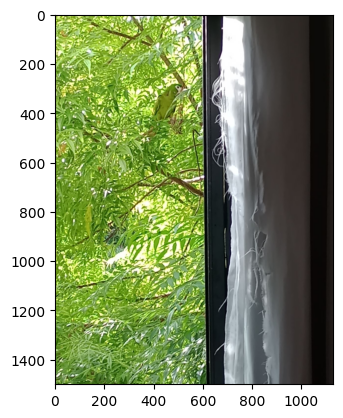

In [ ]:
import cv2
import matplotlib.pyplot as plt

figure = cv2.imread("imagem.jpg")

figure = cv2.cvtColor(figure, cv2.COLOR_BGR2RGB)

plt.imshow(figure)
plt.show()

In [ ]:
import numpy as np

i = 207

j = 300

a = figure[i,j]

print(a)

mask = np.array([
    [-1/9,-1/9,-1/9],
    [-1/9,8/9,-1/9],
    [-1/9,-1/9,-1/9]

])

print(mask)
print(mask.shape)

region_red_layer = figure[i-1:i+2,j-1:j+2,0]

print(region_red_layer)

pad_region_red_layer = region_red_layer.copy()

pad_region_red_layer = np.insert(pad_region_red_layer, 0, pad_region_red_layer[:,1], axis=1)
pad_region_red_layer = np.insert(pad_region_red_layer, 4, pad_region_red_layer[:,0], axis=1)

print(pad_region_red_layer)

pad_region_red_layer = np.insert(pad_region_red_layer, 0, pad_region_red_layer[1,:], axis=0)
pad_region_red_layer = np.insert(pad_region_red_layer, 4, pad_region_red_layer[0,:], axis=0)

print(pad_region_red_layer)

new_red_layer = np.zeros((3,3), dtype=np.uint8)

print(new_red_layer)

for i in range(3):
  for j in range(3):

    mult_red_layer = pad_region_red_layer[i:i+3,j:j+3]*mask

    sum_red = np.sum(mult_red_layer)

    if sum_red < 0:
      new_red_layer[i,j] = 0
    else:
      new_red_layer[i,j] = np.round(sum_red)

new_red_layer_opencv = cv2.filter2D(region_red_layer,-1,mask)

print(new_red_layer)
print(new_red_layer_opencv)

[228 252 176]
[[-0.11111111 -0.11111111 -0.11111111]
 [-0.11111111  0.88888889 -0.11111111]
 [-0.11111111 -0.11111111 -0.11111111]]
(3, 3)
[[140 205 235]
 [159 228 249]
 [176 227 245]]
[[205 140 205 235 205]
 [228 159 228 249 228]
 [227 176 227 245 227]]
[[228 159 228 249 228]
 [205 140 205 235 205]
 [228 159 228 249 228]
 [227 176 227 245 227]
 [228 159 228 249 228]]
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[ 0  0  7]
 [ 0 21 21]
 [ 0 14 11]]
[[ 0  0  7]
 [ 0 21 21]
 [ 0 14 11]]


In [ ]:
height = figure.shape[0]

width = figure.shape[1]

result_fig = np.zeros((height,width,3), dtype=np.uint8)

img_with_borders = figure.copy()

img_with_borders = np.insert(img_with_borders, 0, img_with_borders[:,1], axis=1)
img_with_borders = np.insert(img_with_borders, width+1, img_with_borders[:,width-1], axis=1)

img_with_borders = np.insert(img_with_borders, 0, img_with_borders[1,:], axis=0)
img_with_borders = np.insert(img_with_borders, height+1, img_with_borders[height-1,:], axis=0)

for i in range(height):
  for j in range(width):

    mult_red_layer = img_with_borders[i:i+3,j:j+3,0]*mask
    mult_green_layer = img_with_borders[i:i+3,j:j+3,1]*mask
    mult_blue_layer = img_with_borders[i:i+3,j:j+3,2]*mask

    sum_red = np.sum(mult_red_layer)
    sum_green = np.sum(mult_green_layer)
    sum_blue = np.sum(mult_blue_layer)

    if sum_red < 0:
      result_fig[i,j,0] = 0
    else:
      result_fig[i,j,0] = np.round(sum_red)

    if sum_green < 0:
      result_fig[i,j,1]=0
    else:
      result_fig[i,j,1] = np.round(sum_green)

    if sum_blue < 0:
      result_fig[i,j,2]=0
    else:
      result_fig[i,j,2] = np.round(sum_blue)

result_fig_opencv = cv2.filter2D(figure,-1,mask)

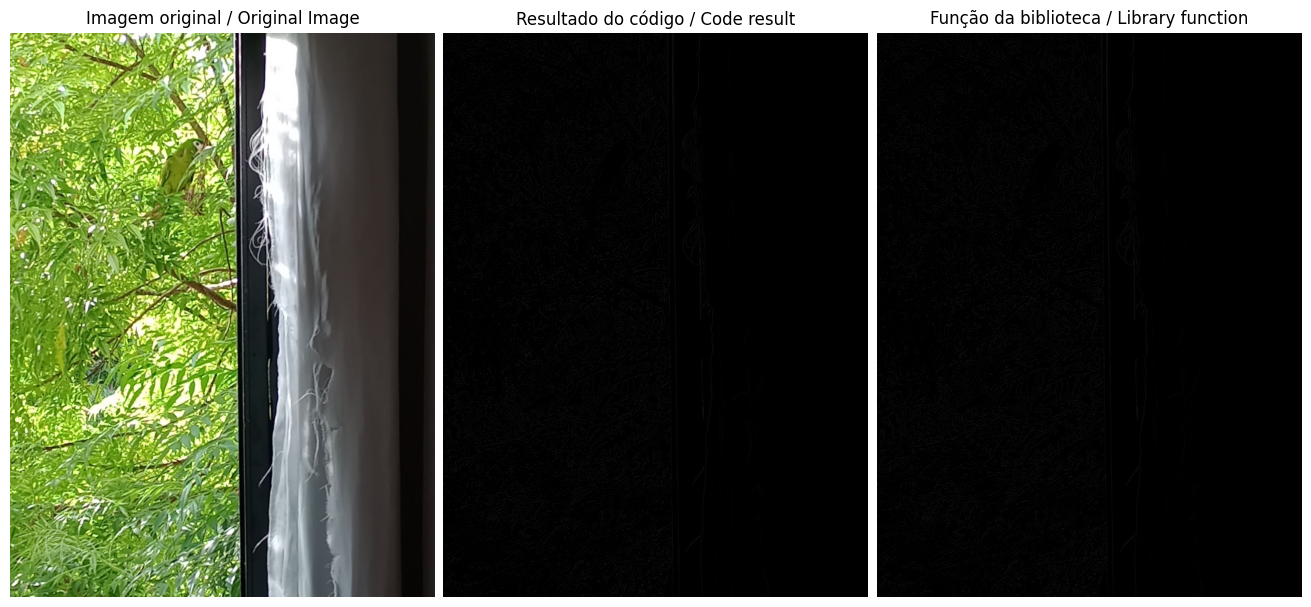

In [ ]:
fig,axs = plt.subplots(1, 3, layout='constrained', figsize = [13,13])

axs[0].imshow(figure)

axs[0].set_title('Imagem original / Original Image')

axs[0].set_axis_off()

axs[1].imshow(result_fig)

axs[1].set_title('Resultado do código / Code result')

axs[1].set_axis_off()

axs[2].imshow(result_fig_opencv)

axs[2].set_title('Função da biblioteca / Library function')

axs[2].set_axis_off()

plt.show()

In [ ]:

A=0

filter_high_boost = np.array([
    [-1,-1,-1],
    [-1,A+8,-1],
    [-1,-1,-1]

])

print(new_red_layer)

red_layer_hb = cv2.filter2D(region_red_layer,-1,filter_high_boost)

print(red_layer_hb)

[[ 0  0  7]
 [ 0 21 21]
 [ 0 14 11]]
[[  0   0  60]
 [  0 188 192]
 [  0 123  96]]


In [ ]:
mask = filter_high_boost

height = figure.shape[0]

width = figure.shape[1]

result_fig = np.zeros((height,width,3), dtype=np.uint8)

img_with_borders = figure.copy()

img_with_borders = np.insert(img_with_borders, 0, img_with_borders[:,1], axis=1)
img_with_borders = np.insert(img_with_borders, width+1, img_with_borders[:,width-1], axis=1)

img_with_borders = np.insert(img_with_borders, 0, img_with_borders[1,:], axis=0)
img_with_borders = np.insert(img_with_borders, height+1, img_with_borders[height-1,:], axis=0)

for i in range(height):
  for j in range(width):

    mult_red_layer = img_with_borders[i:i+3,j:j+3,0]*mask
    mult_green_layer = img_with_borders[i:i+3,j:j+3,1]*mask
    mult_blue_layer = img_with_borders[i:i+3,j:j+3,2]*mask

    sum_red = np.sum(mult_red_layer)
    sum_green = np.sum(mult_green_layer)
    sum_blue = np.sum(mult_blue_layer)

    if sum_red < 0:
      result_fig[i,j,0] = 0
    elif sum_red > 255:
      result_fig[i,j,0] = 255
    else:
      result_fig[i,j,0] = np.round(sum_red)

    if sum_green < 0:
      result_fig[i,j,1]=0
    elif sum_green > 255:
      result_fig[i,j,1]=255
    else:
      result_fig[i,j,1] = np.round(sum_green)

    if sum_blue < 0:
      result_fig[i,j,2]=0
    elif sum_blue > 255:
      result_fig[i,j,2]=255
    else:
      result_fig[i,j,2] = np.round(sum_blue)


result_fig_opencv = cv2.filter2D(figure,-1,mask)

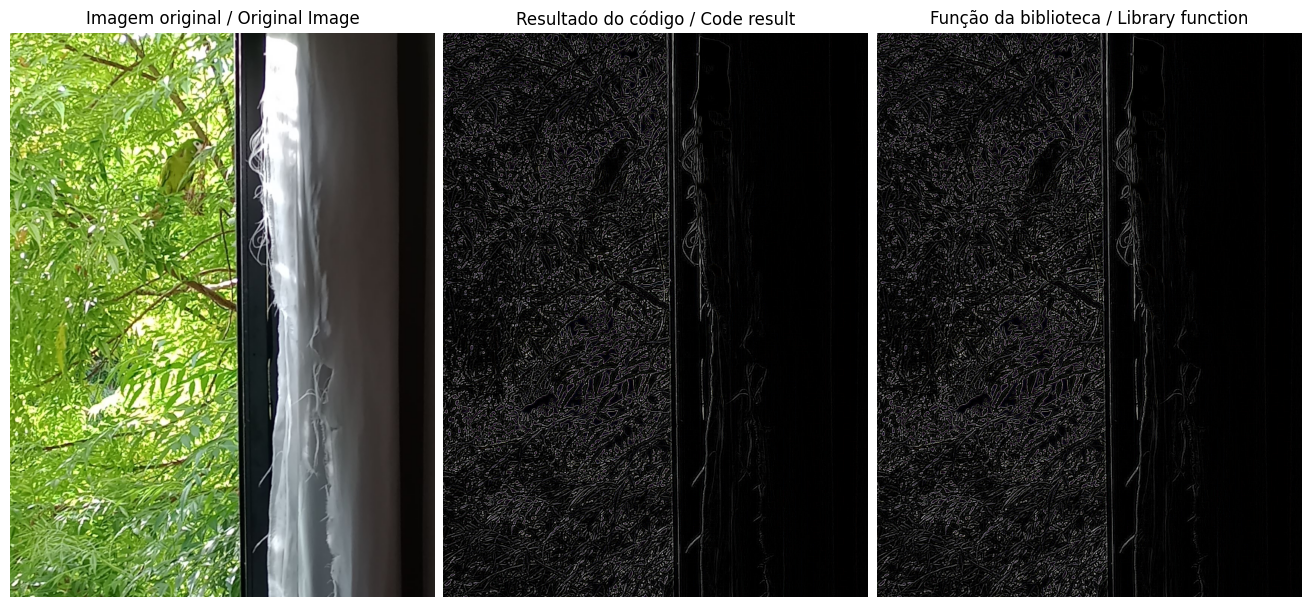

In [ ]:
fig,axs = plt.subplots(1, 3, layout='constrained', figsize = [13,13])

axs[0].imshow(figure)

axs[0].set_title('Imagem original / Original Image')

axs[0].set_axis_off()

axs[1].imshow(result_fig)

axs[1].set_title('Resultado do código / Code result')

axs[1].set_axis_off()

axs[2].imshow(result_fig_opencv)

axs[2].set_title('Função da biblioteca / Library function')

axs[2].set_axis_off()

plt.show()

In [ ]:
subtraction = np.subtract(result_fig,result_fig_opencv)
module = np.abs(subtraction)
sum = np.sum(module)

print(sum)

q = np.array([[-5,4,3]])
j = np.array([[-1,0,3]])
sub = np.subtract(q,j)
print(sub)
mod = np.abs(sub)
print(mod)
print(np.sum(sub))
print(np.sum(mod))

0
[[-4  4  0]]
[[4 4 0]]
0
8
